In [4]:
# Importing Basic Libraries
import warnings as w
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
w.filterwarnings('ignore')


In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [9]:
# Reading the data
df = pd.read_csv(r"C:\Users\harsh\College\ML-Assignments\Data Sets\MLK\cleanusa.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.459,5.683,7.009,4,23086.801,1059033.558
1,79248.642,6.003,6.731,3,40173.072,1505890.915
2,61287.067,5.866,8.513,5,36882.159,1058987.988
3,63345.240,7.188,5.587,3,34310.243,1260616.807
4,59982.197,5.041,7.839,4,26354.109,630943.489


In [10]:
# Exploring the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   int64  
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 234.5 KB


In [11]:
df.describe()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,68585.636,5.977,6.988,3.732,36159.071,1232028.313
std,10592.080,0.987,1.002,1.226,9862.221,351259.802
min,40026.398,3.329,4.249,2.000,9217.886,287127.531
25%,61480.562,5.322,6.299,3.000,29403.929,997577.135
50%,68804.286,5.970,7.003,4.000,36199.407,1232669.378
75%,75783.339,6.651,7.666,4.000,42861.291,1471210.204
max,97237.503,8.644,9.716,6.000,63047.334,2181659.808


In [12]:
# Checking for null values
df.isnull().sum()


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

Avg. Area Income


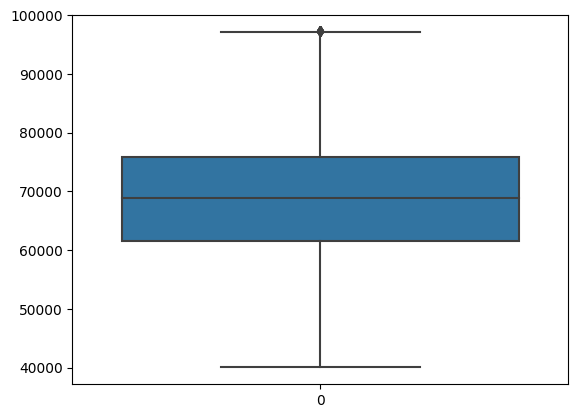

Avg. Area House Age


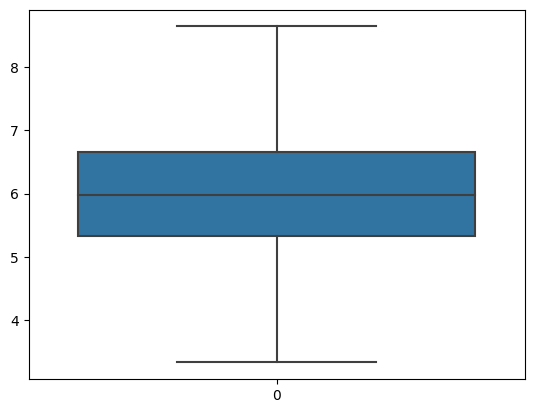

Avg. Area Number of Rooms


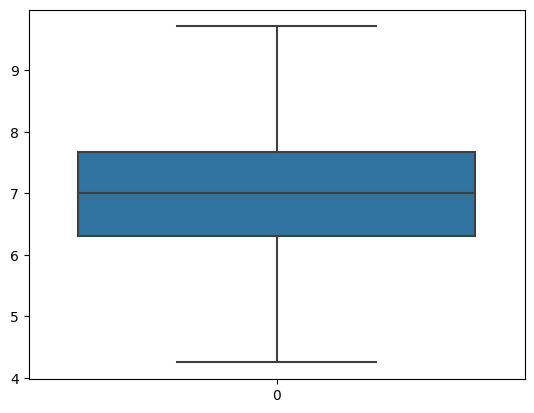

Avg. Area Number of Bedrooms


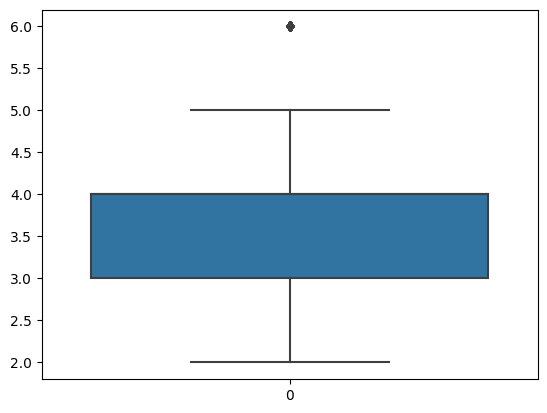

Area Population


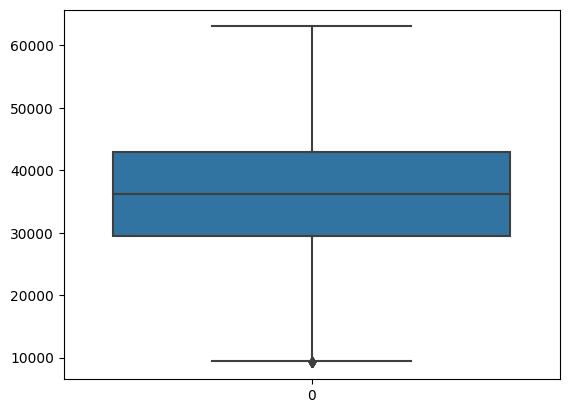

Price


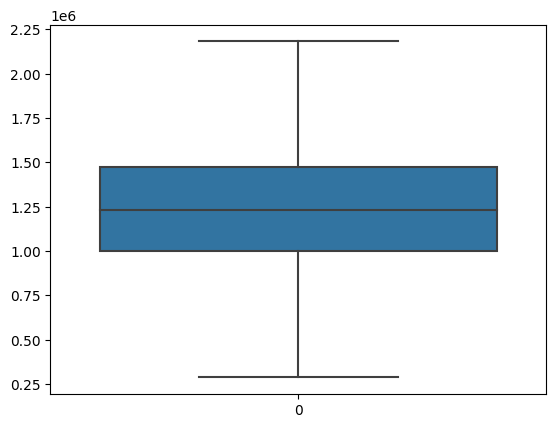

In [15]:
# Checking for outliers
for i in df.columns:
    print(i)
    sns.boxplot(df[i])
    plt.show()


In [ ]:
# Removing outliers using Inter Quartile Range of every column
for i in df.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    df = df[(df[i] > low) & (df[i] < high)]


In [ ]:
# Removing outliers
from scipy.stats import zscore

z = np.abs(zscore(df))
df = df[(z < 3).all(axis=1)]

In [ ]:
# Checking for skewness
df.skew()


Avg. Area Income               -0.023
Avg. Area House Age             0.005
Avg. Area Number of Rooms      -0.052
Avg. Area Number of Bedrooms    0.373
Area Population                 0.032
Price                          -0.010
dtype: float64

In [ ]:
# Changing the data type of Avg. Area Number of Rooms and Avg. Area Number of Bedrooms
df[["Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms"]] = df[
    ["Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms"]
].astype("int64")

In [ ]:
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.459,5.683,7,4,23086.801,1059033.558
1,79248.642,6.003,6,3,40173.072,1505890.915
2,61287.067,5.866,8,5,36882.159,1058987.988
3,63345.240,7.188,5,3,34310.243,1260616.807
4,59982.197,5.041,7,4,26354.109,630943.489


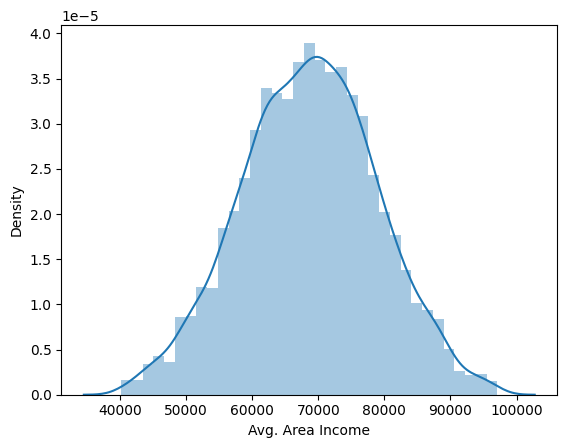

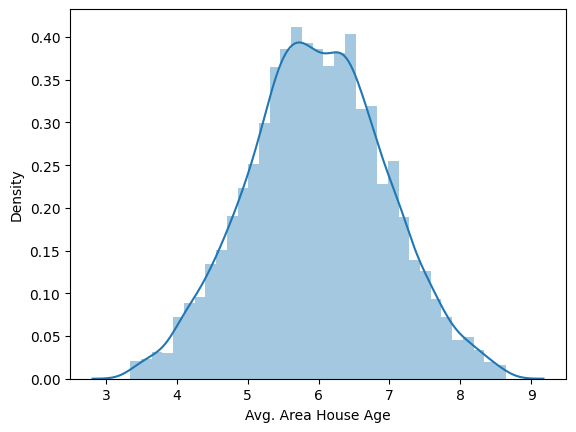

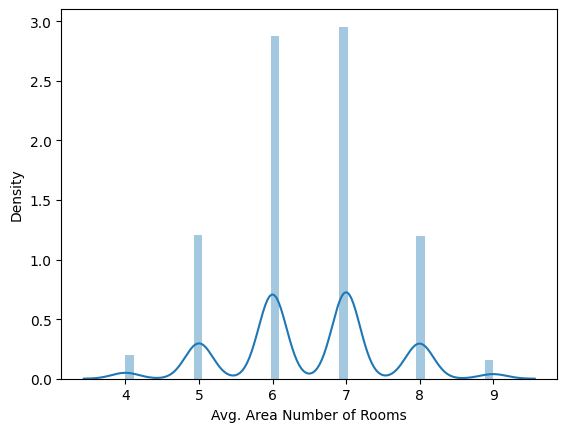

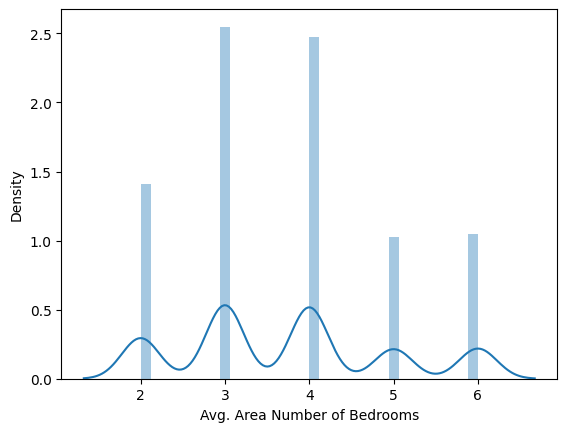

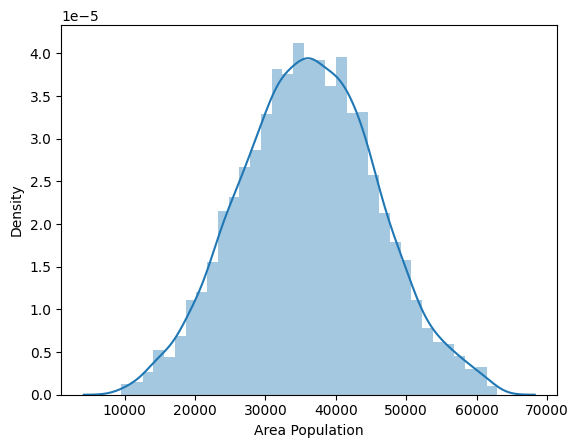

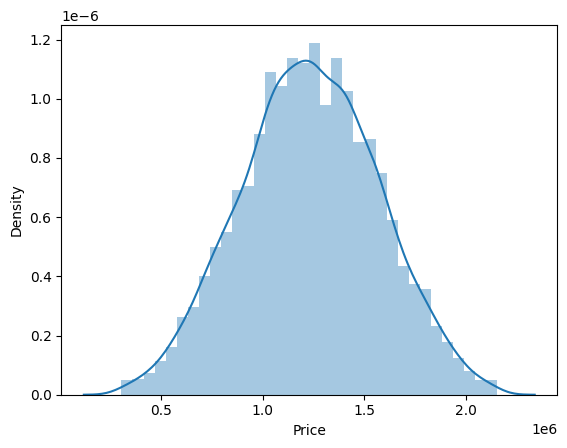

In [ ]:
# Plotting the data distribution
for i in df.columns:
    sns.distplot(df[i])
    plt.show()


In [ ]:
# Splitting the data into X and y
X = df.drop("Price", axis=1)
y = df[["Price"]]

In [ ]:
# Getting feature list who have unique values more than 10
feature_list = [feature for feature in X.columns if X[feature].nunique() > 10]
feature_list

['Avg. Area Income', 'Avg. Area House Age', 'Area Population']

In [ ]:
# Splitting the data into train and test
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling the data

sc = MinMaxScaler()
SCX_train = X_train.copy(deep=True)
SCX_test = X_test.copy(deep=True)
SCX_train[feature_list] = sc.fit_transform(SCX_train[feature_list])
SCX_test[feature_list] = sc.transform(SCX_test[feature_list])

In [19]:
# Importing the Regression Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Importing the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Making a list of tuples model name and models
model_list = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor(n_estimators=200)),
    ("KNN", KNeighborsRegressor()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(verbosity=0)),
    ("CatBoost", CatBoostRegressor(verbose=0)),
]

## Model Building on Original Data

In [20]:
# Making a dataframe to store metrics and comparing the models
df_metrics = pd.DataFrame(columns=["Model", "R2 Score", "RMSE", "MAE"])

# Fitting the models and storing the metrics
for name, model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df_metrics = df_metrics.append(
        {
            "Model": name,
            "R2 Score": r2_score(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "MAE": mean_absolute_error(y_test, y_pred),
        },
        ignore_index=True,
    )

# Comparing the models
df_metrics.sort_values(by="R2 Score", ascending=False)

,Model,R2 Score,RMSE,MAE,MSE
0,Linear Regression,0.897,104795.341,84459.323,10982063410.317
6,CatBoost,0.887,109579.215,88738.447,12007604458.537
2,Random Forest,0.860,121887.909,97421.226,14856662288.509
5,XGBoost,0.859,122642.155,98515.555,15041098237.996
1,Decision Tree,0.707,176749.710,140746.487,31240459932.225
3,KNN,0.455,240951.834,191141.307,58057786169.715
4,SVR,-0.001,326365.420,261292.022,106514387490.398


In [21]:
# Making a dataframe to store metrics and comparing the models
df_metrics = pd.DataFrame(columns=["Model", "R2 Score", "RMSE", "MAE"])

# Fitting the models and storing the metrics
for name, model in model_list:
    model.fit(SCX_train, y_train)
    y_pred = model.predict(SCX_test)
    df_metrics = df_metrics.append(
        {
            "Model": name,
            "R2 Score": r2_score(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "MAE": mean_absolute_error(y_test, y_pred),
        },
        ignore_index=True,
    )

# Comparing the models
df_metrics.sort_values(by="R2 Score", ascending=False)

,Model,R2 Score,RMSE,MAE,MSE
0,Linear Regression,0.897,104795.341,84459.323,10982063410.316
6,CatBoost,0.887,109467.478,88693.205,11983128658.583
2,Random Forest,0.860,122175.969,97437.643,14926967442.817
5,XGBoost,0.859,122642.155,98515.555,15041098237.996
3,KNN,0.821,138068.308,109520.011,19062857566.577
1,Decision Tree,0.698,179430.211,143282.998,32195200468.888
4,SVR,-0.001,326415.528,261329.560,106547097017.343
